# 기초 분석 생략

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/shopping_trends_updated.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Item 세분화

In [3]:
df["Item Purchased"].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

## 중분류 카테고리 생성

In [4]:
## 중분류 카테고리 생성
# 그룹화할 아이템의 리스트 생성
tops = ['Blouse', 'Shirt', 'Sweater', 'Hoodie', 'T-shirt']
outers = ['Jacket', 'Coat']
bottoms = ['Pants', 'Skirt', 'Shorts', 'Jeans', 'Dress']
shoes = ['Sandals', 'Shoes', 'Sneakers', 'Boots']
accessories = ['Jewelry', 'Belt', 'Sunglasses']
wear_acc = ['Scarf', 'Hat', 'Gloves', 'Socks']
bags = ['Handbag', 'Backpack']

# 아이템을 그룹화하는 함수 정의
def categorize_item(item):
    if item in tops:
        return 'tops'
    elif item in outers:
        return 'outers'
    elif item in bottoms:
        return 'bottoms'
    elif item in shoes:
        return 'shoes'
    elif item in accessories:
        return 'accessories'
    elif item in bags:
        return 'bags'
    elif item in wear_acc:
        return 'wear_acc'
    else:
        return 'else'

# 아이템 카테고리 추가
df['Item Purchased_new'] = df['Item Purchased'].apply(categorize_item)

# 결과 확인
df['Item Purchased_new'].value_counts()


Item Purchased_new
tops           802
bottoms        776
wear_acc       610
shoes          599
accessories    493
outers         324
bags           296
Name: count, dtype: int64

## 아이템별 구매 현황

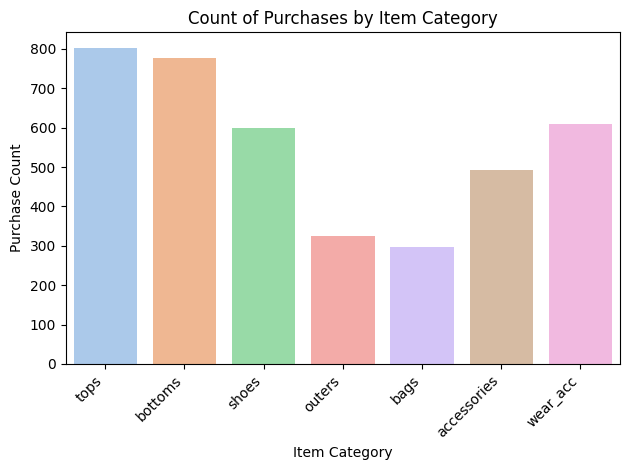

In [5]:
# 시각화
sns.countplot(data=df, x='Item Purchased_new', palette='pastel')
plt.title('Count of Purchases by Item Category')
plt.xlabel('Item Category')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 성별에 따른 구매 현황

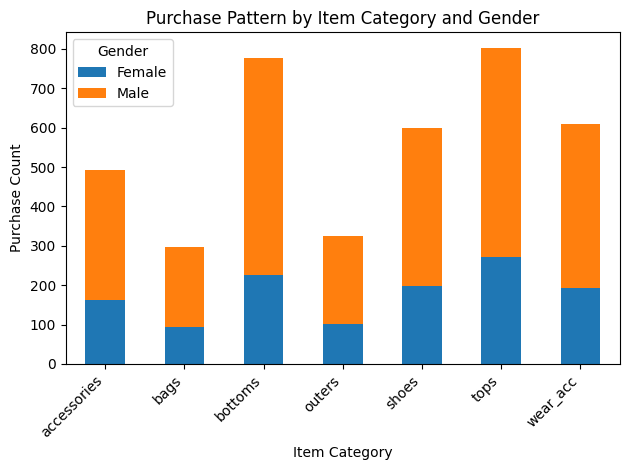

In [6]:
# Item Purchased_new와 성별에 따른 구매 패턴 그룹화
grouped_data = df.groupby(['Item Purchased_new', 'Gender']).size().unstack()

# 시각화
grouped_data.plot(kind='bar', stacked=True)
plt.title('Purchase Pattern by Item Category and Gender')
plt.xlabel('Item Category')
plt.ylabel('Purchase Count')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

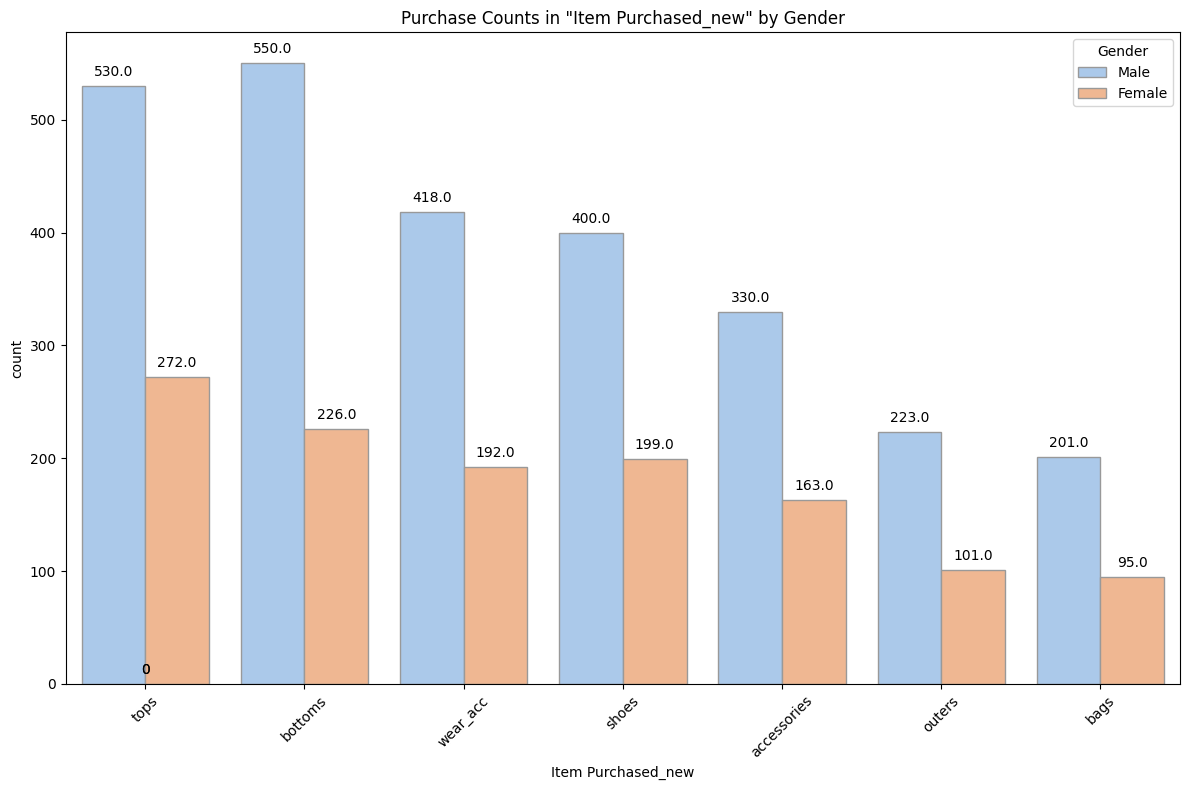

In [7]:
# Gender,Category에 따른 구매 현황 시각화
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Item Purchased_new', hue='Gender', data=df, palette='pastel', edgecolor=".6", order=df['Item Purchased_new'].value_counts().index)
plt.title('Purchase Counts in "Item Purchased_new" by Gender')
plt.xticks(rotation=45)

# 각 막대 위에 count 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


## 연령대를 고려한 아이템 구매 현황

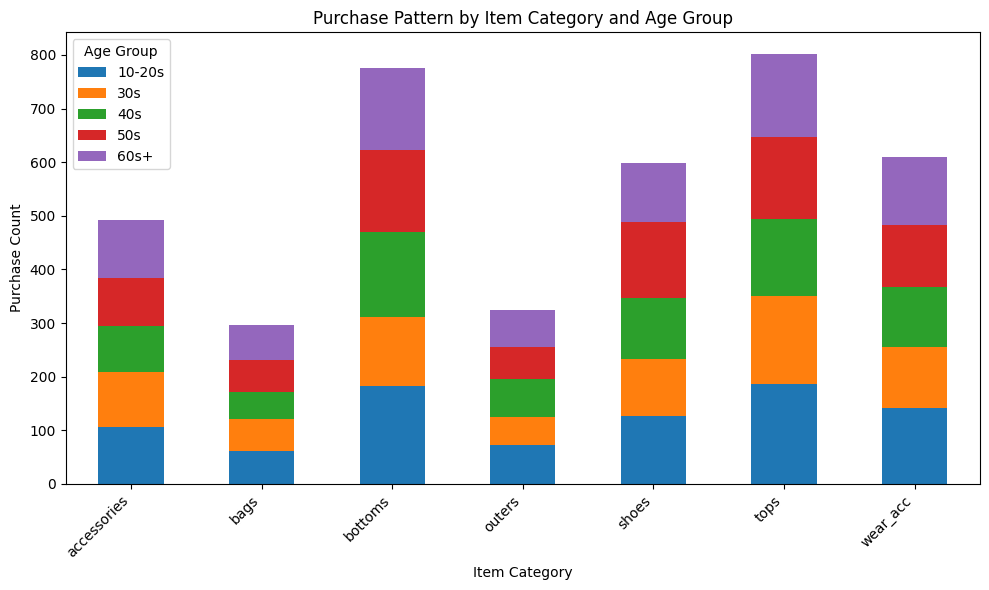

In [8]:
# 나이를 연령대로 그룹화하는 함수 정의
def categorize_age(age):
    if age < 30:
        return '10-20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s+'

# Age를 연령대로 그룹화
df['Age_group'] = df['Age'].apply(categorize_age)

# Item Purchased_new와 연령대에 따른 구매 패턴 그룹화
grouped_data = df.groupby(['Item Purchased_new', 'Age_group']).size().unstack()

# 시각화
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Purchase Pattern by Item Category and Age Group')
plt.xlabel('Item Category')
plt.ylabel('Purchase Count')
plt.legend(title='Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


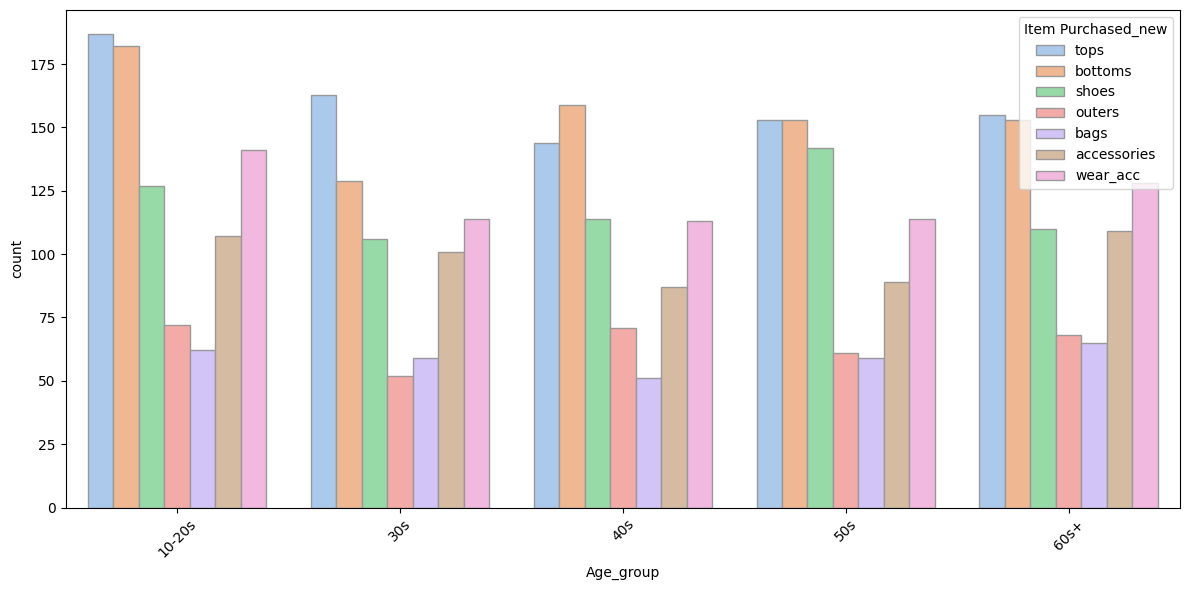

In [9]:
# 'Age_group' 순서 정의
age_order = ['10-20s', '30s', '40s', '50s', '60s+']
df['Age_group'] = pd.Categorical(df['Age_group'], categories=age_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.countplot(x='Age_group', hue='Item Purchased_new', data=df, palette='pastel', edgecolor=".6", order=age_order)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
df['Age_group'].value_counts()

Age_group
10-20s    878
60s+      788
50s       771
40s       739
30s       724
Name: count, dtype: int64

In [11]:
# 아이템 카테고리별로 어떤 나이대의 구매가 가장 많은지 찾기
top_age_by_item = df.groupby(['Item Purchased_new'])['Age_group'].value_counts().groupby(level=0).nlargest(1)

# 결과 출력
print(top_age_by_item)

Item Purchased_new  Item Purchased_new  Age_group
accessories         accessories         60s+         109
bags                bags                60s+          65
bottoms             bottoms             10-20s       182
outers              outers              10-20s        72
shoes               shoes               50s          142
tops                tops                10-20s       187
wear_acc            wear_acc            10-20s       141
Name: count, dtype: int64


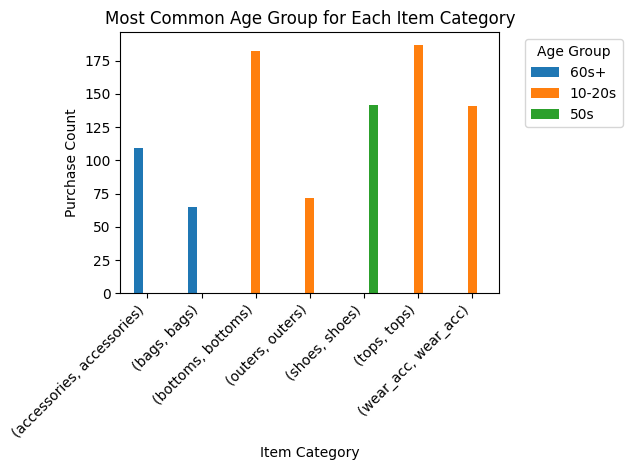

In [12]:
# 시각화
top_age_by_item.unstack().plot(kind='bar')
plt.title('Most Common Age Group for Each Item Category')
plt.xlabel('Item Category')
plt.ylabel('Purchase Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


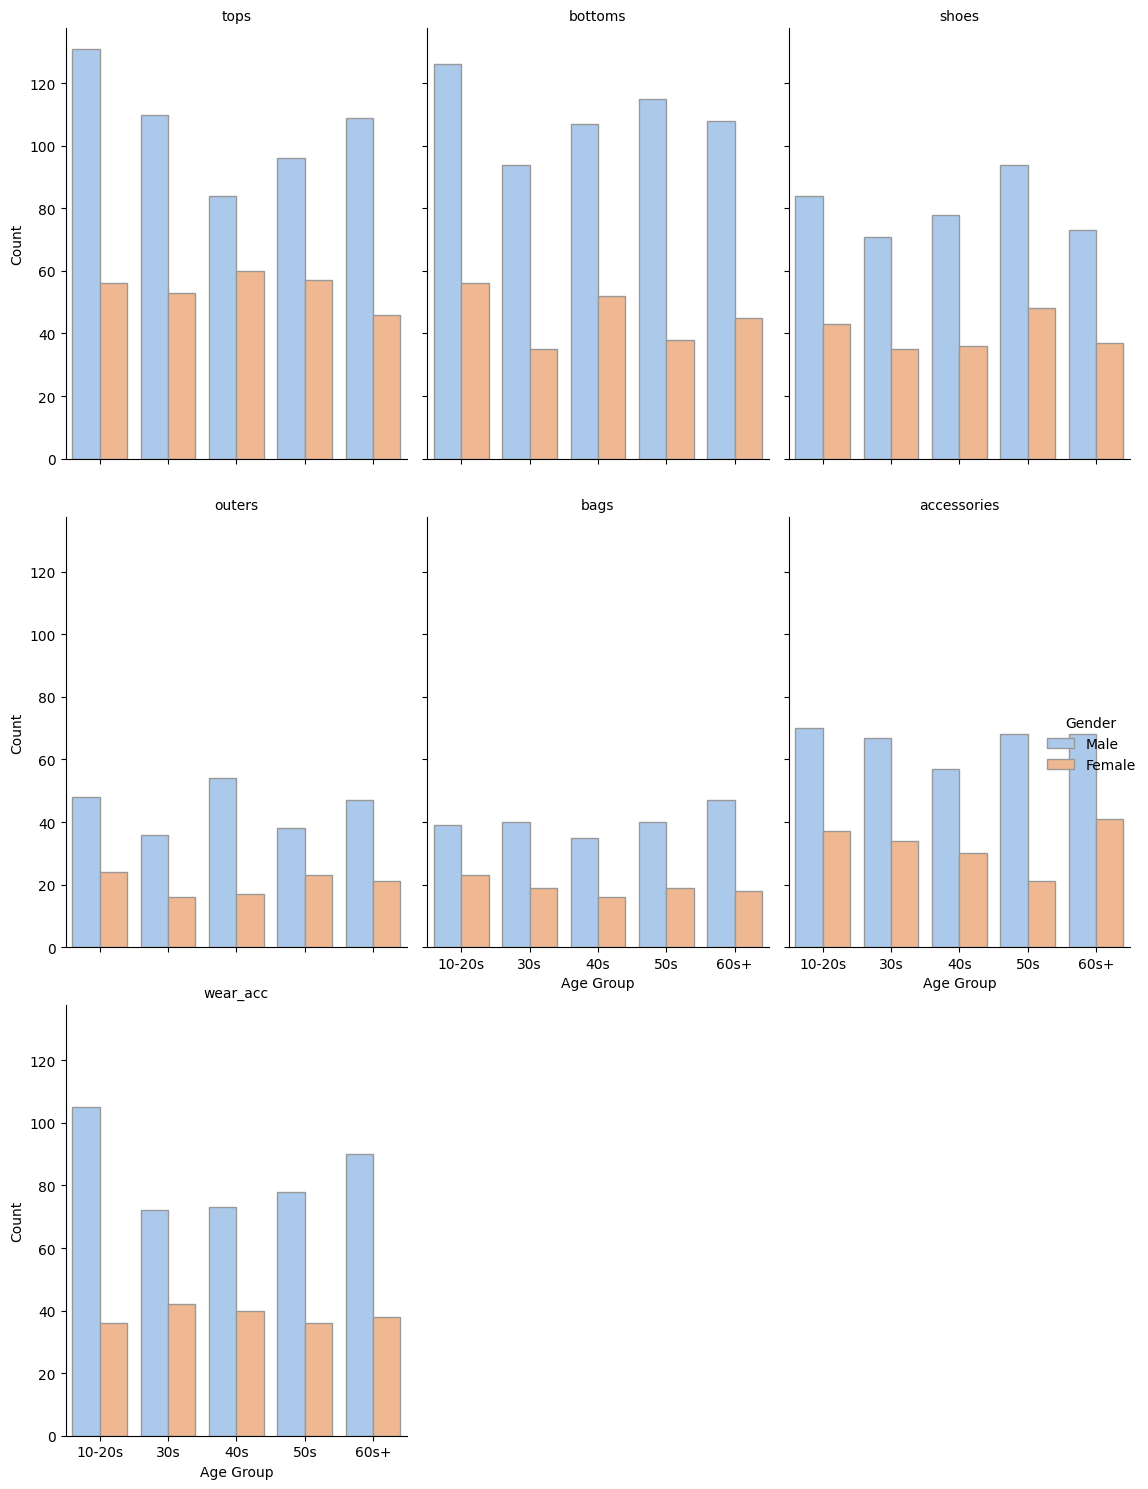

In [13]:
# 연령대, 카테고리별 구매 현황을 성별 색상으로 구분하여 시각화
g = sns.catplot(x='Age_group', hue='Gender', col='Item Purchased_new', data=df, 
                kind='count', height=5, aspect=0.7, palette='pastel', edgecolor=".6", col_wrap=3)

g.set_titles("{col_name}")
g.set_axis_labels("Age Group", "Count")
plt.xticks()
plt.tight_layout()
plt.show()


## 구매율 상위 10개 지역의 구매 아이템 파악

In [14]:
df["Location"].value_counts().head(10)

Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
Nebraska      87
New York      87
Nevada        87
Maryland      86
Name: count, dtype: int64

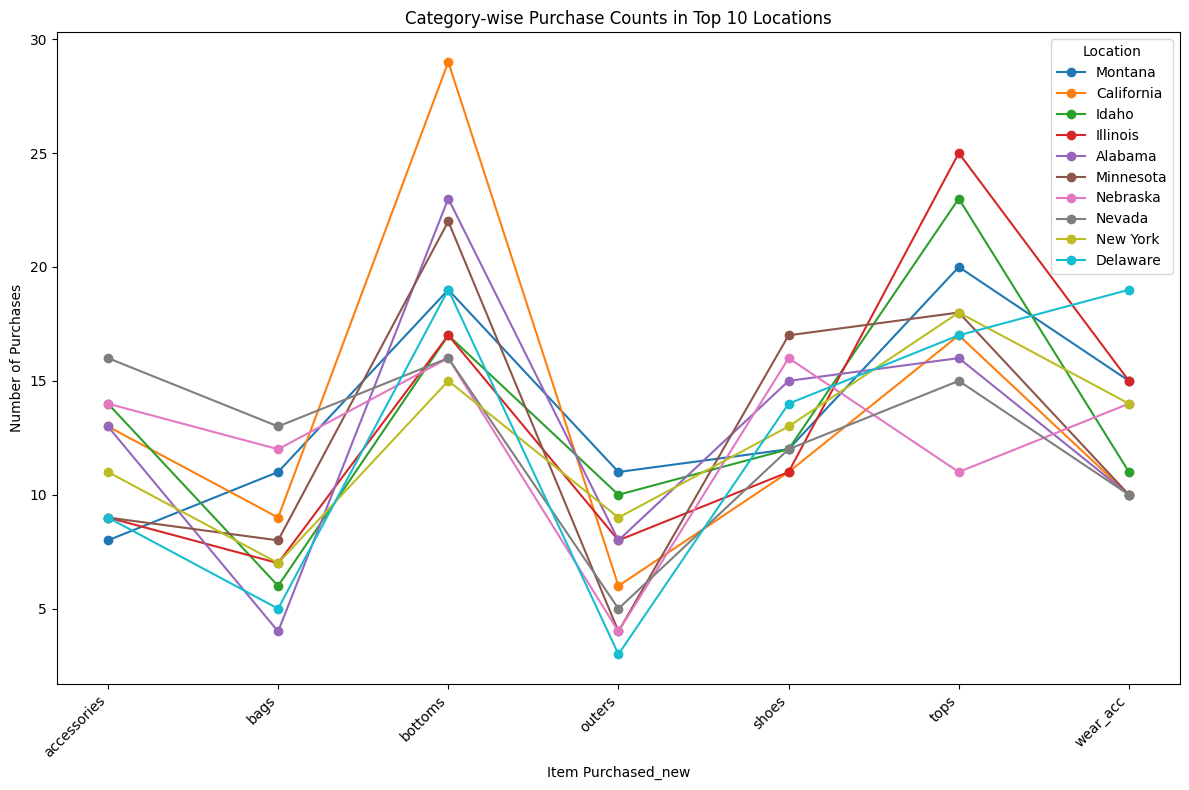

In [15]:
# 각 지역과 카테고리별로 제품 구매량 계산 (물품 세분화)
purchase_counts = df.groupby(['Location', 'Item Purchased_new']).size().reset_index(name='Purchase Count')

# 상위 10개 지역 선택
top_10_locations = purchase_counts.groupby('Location')['Purchase Count'].sum().nlargest(10).index
top_10_purchase_counts = purchase_counts[purchase_counts['Location'].isin(top_10_locations)]

# 상위 10개 지역의 각 카테고리별 구매량 시각화
plt.figure(figsize=(12, 8))
for location in top_10_locations:
    data = top_10_purchase_counts[top_10_purchase_counts['Location'] == location]
    plt.plot(data['Item Purchased_new'], data['Purchase Count'], marker='o', label=location)

plt.xlabel('Item Purchased_new')
plt.ylabel('Number of Purchases')
plt.title('Category-wise Purchase Counts in Top 10 Locations')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

In [16]:
# 각 지역에서 Purchase Count가 가장 높은 카테고리들만 필터링
top_categories_by_location = top_10_purchase_counts.groupby('Item Purchased_new').apply(lambda x: x.nlargest(1, 'Purchase Count')).reset_index(drop=True)
top_categories_by_location

,Location,Item Purchased_new,Purchase Count
0,Nevada,accessories,16
1,Nevada,bags,13
2,California,bottoms,29
3,Montana,outers,11
4,Minnesota,shoes,17
5,Illinois,tops,25
6,Delaware,wear_acc,19


## 계절별 구매 현황

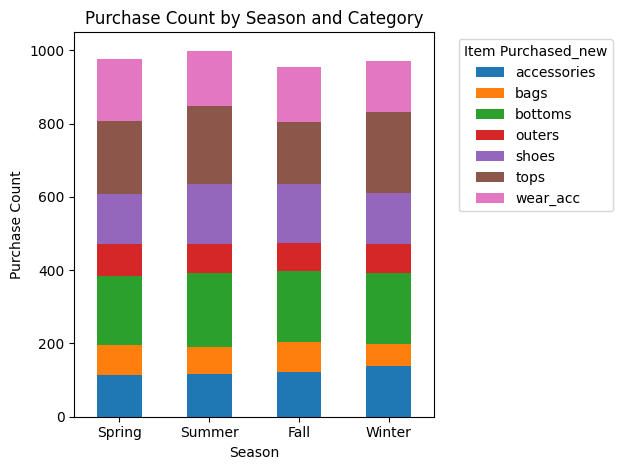

In [17]:
# 각 계절별로 카테고리별 구매 수 계산
purchase_counts_by_season_category = df.groupby(['Season', 'Item Purchased_new']).size().unstack(fill_value=0)

# 시각화
purchase_counts_by_season_category.plot(kind='bar', stacked=True)
seasons = ['Spring', 'Summer', 'Fall', 'Winter']  # 계절 순서 변경
plt.xticks(range(len(seasons)), seasons, rotation=0)  # 라벨 가로로 표시
plt.xlabel('Season')
plt.ylabel('Purchase Count')
plt.title('Purchase Count by Season and Category')
plt.legend(title='Item Purchased_new', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
# 각 계절별로 제품 구매량 계산
purchase_counts_by_season = df.groupby(['Season', 'Item Purchased_new']).size().reset_index(name='Purchase Count')

# 각 계절별 총 구매량 계산
total_purchases_by_season = purchase_counts_by_season.groupby('Season')['Purchase Count'].sum().reset_index(name='Total Purchases')

# 각 계절별 제품 구매 비율 계산
purchase_counts_by_season = pd.merge(purchase_counts_by_season, total_purchases_by_season, on='Season')
purchase_counts_by_season['Purchase Percentage'] = (purchase_counts_by_season['Purchase Count'] / purchase_counts_by_season['Total Purchases']) * 100
purchase_counts_by_season

,Season,Item Purchased_new,Purchase Count,Total Purchases,Purchase Percentage
0,Fall,accessories,115,975,11.79
1,Fall,bags,82,975,8.41
2,Fall,bottoms,187,975,19.18
3,Fall,outers,88,975,9.03
4,Fall,shoes,136,975,13.95
5,Fall,tops,198,975,20.31
6,Fall,wear_acc,169,975,17.33
7,Spring,accessories,116,999,11.61
8,Spring,bags,75,999,7.51
9,Spring,bottoms,200,999,20.02


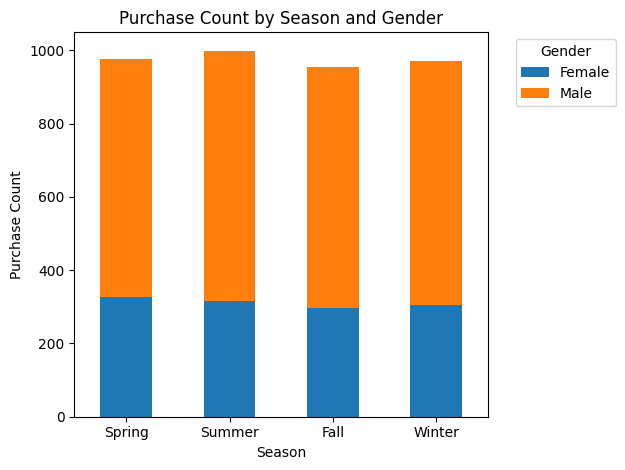

In [19]:
# 계절별, 성별 구매 수 계산 및 시각화
purchase_counts_by_season_gender = df.groupby(['Season', 'Gender']).size().unstack(fill_value=0)
purchase_counts_by_season_gender.plot(kind='bar', stacked=True)
seasons = ['Spring', 'Summer', 'Fall', 'Winter']  # 계절 순서 변경
plt.xticks(range(len(seasons)), seasons, rotation=0)  # 라벨 가로로 표시
plt.xlabel('Season')
plt.xlabel('Season')
plt.ylabel('Purchase Count')
plt.title('Purchase Count by Season and Gender')
plt.legend(title='Gender')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

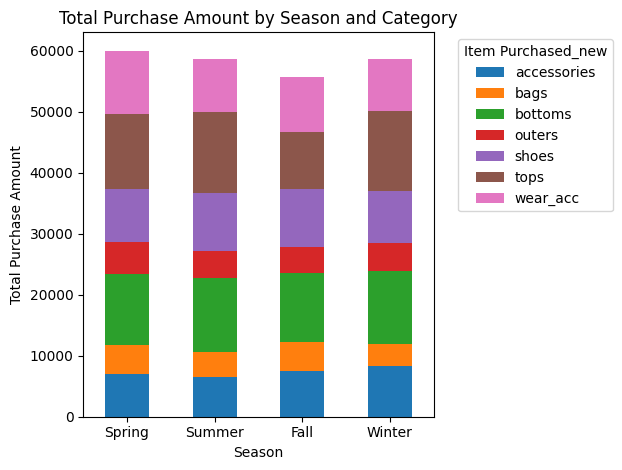

In [20]:
# 계절별, 카테고리별 총 구매 금액 계산 및 시각화
df['Purchase Amount (USD)'] = pd.to_numeric(df['Purchase Amount (USD)'], errors='coerce')  # 구매 금액을 숫자형으로 변환
total_purchase_amount_by_season_category = df.groupby(['Season', 'Item Purchased_new'])['Purchase Amount (USD)'].sum().unstack(fill_value=0)
total_purchase_amount_by_season_category.plot(kind='bar', stacked=True)
seasons = ['Spring', 'Summer', 'Fall', 'Winter']  # 계절 순서 변경
plt.xticks(range(len(seasons)), seasons, rotation=0)  # 라벨 가로로 표시
plt.xlabel('Season')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Season and Category')
plt.legend(title='Item Purchased_new', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

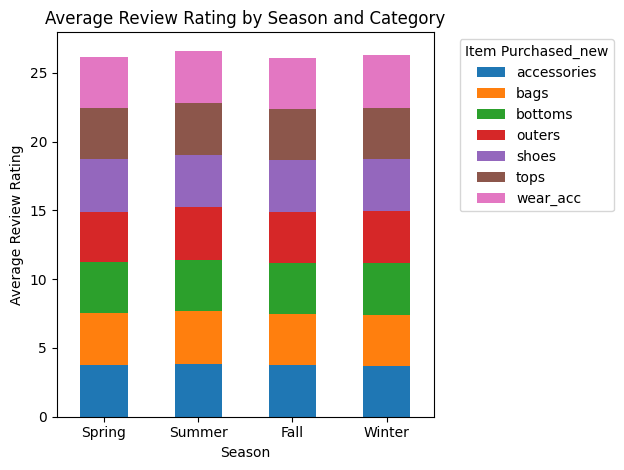

In [21]:
# 계절별, 제품별 평균 리뷰 평점 계산 및 시각화
df['Review Rating'] = pd.to_numeric(df['Review Rating'], errors='coerce')  # 리뷰 평점을 숫자형으로 변환
average_review_rating_by_season_category = df.groupby(['Season', 'Item Purchased_new'])['Review Rating'].mean().unstack(fill_value=0)
average_review_rating_by_season_category.plot(kind='bar', stacked=True)
seasons = ['Spring', 'Summer', 'Fall', 'Winter']  # 계절 순서 변경
plt.xticks(range(len(seasons)), seasons, rotation=0)  # 라벨 가로로 표시
plt.xlabel('Season')
plt.xlabel('Season')
plt.ylabel('Average Review Rating')
plt.title('Average Review Rating by Season and Category')
plt.legend(title='Item Purchased_new', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()